In [ ]:
! pip install fastkaggle fastai pandas fastcore --quiet

In [ ]:
from fastkaggle import *
from fastcore.all import *
from fastai.text.all import *
import pandas as pd

In [ ]:
if not iskaggle: api = import_kaggle()

In [ ]:
comp_name = "contradictory-my-dear-watson"

In [ ]:
dpath = setup_comp(comp_name)

In [ ]:
dpath.ls()

(#3) [Path('contradictory-my-dear-watson/test.csv'),Path('contradictory-my-dear-watson/train.csv'),Path('contradictory-my-dear-watson/sample_submission.csv')]

In [ ]:
train_df = pd.read_csv(dpath/"train.csv")
test_df = pd.read_csv(dpath/"test.csv")
def process_df(df):
    cols = ['premise', 'hypothesis', 'lang_abv', 'language']
    df["text"] = df.apply(lambda x: "<s>".join(x[c] for c in cols), axis=1)
    df.drop(cols, axis=1, inplace=True)
process_df(train_df)
process_df(test_df)

In [ ]:
train_df.head(1)

,id,label,text
0,5130fd2cb5,0,and these comments were considered in formulating the interim rules.<s>The rules developed in the interim were put together with these comments in mind.<s>en<s>English


In [ ]:
test_df.head(1)

,id,text
0,c6d58c3f69,"بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولمبین ہائی اسکول کے دوسرے طلبا کے نام سے بکسوں کو نشان زد کیا جائے گا جس نے اس سال پہلے اپنی زندگی کھو دی<s>کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی اسکول کے طالب علموں میں سے ایک جو مر گیا.<s>ur<s>Urdu"


In [ ]:
dls = TextDataLoaders.from_df(train_df, path=dpath, text_col='text', label_col='label', seq_len=1024)
dls.show_batch(max_n=3)

,text,category
0,xxbos and i look back on that and i bought shoes i went shopping i did not need that money i did not need it i did n't need it i should n't have even qualified to get it i did n't need it and it would have been a little rough i might have eaten some xxunk instead of xxunk beef out of the xxunk but i did not need it and as i look back now now we 're paying that back i told my son if you have to live in the ghetto to go to college do it but do n't take out ten thousand dollars in loans do n't do it and i do n't i hope do n't think he 'll have to do that but i just so like we might if we did n't have those loans we could have saved in,1
1,xxbos yes they would they just would n't be able to own the kind of automobiles that they think they deserve to own or the kind of homes that we think we deserve to own we might have to you know just be able to i think if we a generation went without debt then the next generation like if if our our generation my husband and i we 're twenty eight if we lived our lives and did n't become you know indebted like you know our generation before us that um the budget would balance and that we became accustomed to living with what we could afford which we would n't be destitute i mean we would n't be living on the street by any means but just compared to how spoiled we are we would be in our own minds but i feel like the generation after,2
2,xxbos yeah the the i mean people like that are crazy i did a study on it though when i was in high school it was one of these things we had to pick a topic to to investigate and at that time i do n't think it 's like that any more but at that time uh it was very unfair capital punishment was a lot more common and if you tended and it tended to be that if you were ignorant or if you were a foreigner or if you were black or any minority for that matter the chances your chances of of uh getting the death penalty were you know like hundreds of times greater than if you could just communicate well i mean you did n't have to be um you did n't even necessarily have to be white but if you could just communicate,2


In [ ]:
tdls = dls.test_dl(test_df)

In [ ]:
model = get_text_classifier(AWD_LSTM, len(dls.vocab[0]), len(dls.vocab[1]), seq_len=1024)

In [ ]:
learn = TextLearner(dls, model, metrics=accuracy, loss_func=CrossEntropyLossFlat())

SuggestedLRs(valley=0.0002754228771664202)

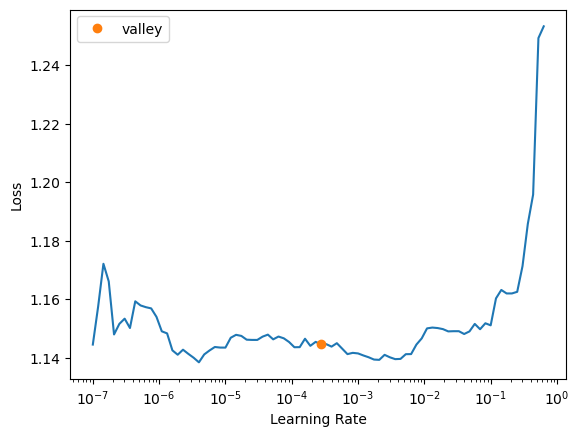

In [ ]:
learn.lr_find()

In [ ]:
learn.fit(5, 2e-3)

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

In [ ]:
learn.show_results()

In [ ]:
probs,_,idxs = learn.get_preds(dl=tdls, with_decoded=True)

In [ ]:
test_df["prediction"] = idxs

In [ ]:
test_df[["id", "prediction"]].to_csv("submission.csv", index=False)

In [ ]:
if not iskaggle: 
    push_notebook('vempaliakhil96', 'exp-1',
                  title='exp-1',
                  file='01-exp.ipynb',
                  competition=comp_name, 
                  private=False, 
                  gpu=True)

Kernel version 4 successfully pushed.  Please check progress at https://www.kaggle.com/code/vempaliakhil96/exp-1
